## Stacked auto encoder for ADHD

## By mahtab vaezi, 1397

In [1]:
Path = "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data" 

Files=dir(Path);  %%masir tamam file ha  ra dakhele files beriz


Path = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data"




In [2]:
X_2=[];
X_1=[];

for i=1:length(Files)
    if startsWith(Files(i,1).name,'.') ~= 1
        disp(Files(i,1).name)
        file = append(Path,"\",Files(i,1).name)
        x=load(file);


        x=x(:,1);               %% 1 channel
        m=size(x(:,1));
        m1=m(1,1)/180;
        m1=floor(m1);
        x1=x(m1*41:m1*43);
        x2=x(m1*51:m1*53);
        x3=x(m1*56:m1*58);
        x4=x(m1*66:m1*68);
        x5=x(m1*86:m1*88);
        x6=x(m1*93:m1*95);
        x7=x(m1*126:m1*128);
        x8=x(m1*147:m1*149);
        x9=x(m1*169:m1*171);
        x10=x(m1*174:m1*176);
        
        X_1=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10];
        [s1,s2]=size(X_1);
        X_2=[X_2;X_1];
      
  end
end

X=X_2;
X=X';

1-AMIRMAHDI SAFARI-9- TASK.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-AMIRMAHDI SAFARI-9- TASK.TXT"

1-ATAEE ASHKAN-R-7- TASK.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-ATAEE ASHKAN-R-7- TASK.TXT"

1-Aboofazeli Ali-12-R-EC.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Aboofazeli Ali-12-R-EC.TXT"

1-Aghababaii ali-7-ec.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Aghababaii ali-7-ec.TXT"

1-Alijani Pooria-R-6-Task.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Alijani Pooria-R-6-Task.TXT"

1-Arab M-12-L-EC.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Arab M-12-L-EC.TXT"

1-Asgari H-5-L-EC.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Asgari H-5-L-EC.TXT"

1-Azimi MR-10-R-EC.TXT

file = 

    "C:\Gorji\Dropbox\Old\ADHD\ADHD\timeseries\deta\all_data\1-Azimi MR-10-R-EC.

## Target

In [3]:
T=[ones(26575,1),zeros(26575,1);ones(11798,1),ones(11798,1)];        %channel 1
T=T';

## Stacked auto-encoder

In [4]:
hiddenSize = 10;
autoenc1 = trainAutoencoder(X,hiddenSize,...
    'L2WeightRegularization',0.001,...
    'SparsityRegularization',4,...
    'SparsityProportion',0.05,...
    'DecoderTransferFunction','purelin');
features1 = encode(autoenc1,X);

In [5]:
hiddenSize = 10;
autoenc2 = trainAutoencoder(features1,hiddenSize,...
    'L2WeightRegularization',0.001,...
    'SparsityRegularization',4,...
    'SparsityProportion',0.05,...
    'DecoderTransferFunction','purelin',...
    'ScaleData',false);
features2 = encode(autoenc2,features1);

In [6]:
softnet = trainSoftmaxLayer(features2,T,'LossFunction','crossentropy');
deepnet = stack(autoenc1,autoenc2,softnet);

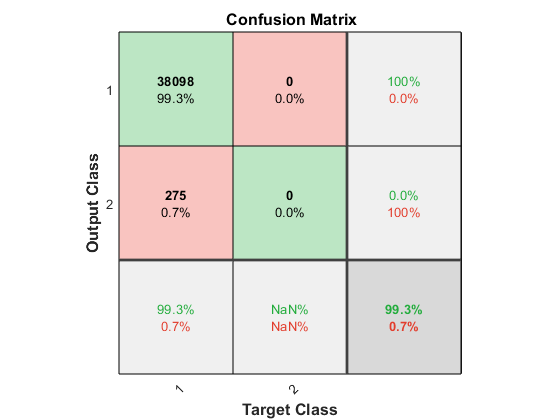

In [7]:
deepnet = train(deepnet,X,T);
wine_type = deepnet(X);
plotconfusion(T,wine_type);

In [8]:
[c,cm,ind,per]=confusion(T,wine_type);

In [9]:
%% Kappa Calculation
confusion_matrix=cm;
num_class=2;

PA=0;
for i=1:num_class
    PA=confusion_matrix(i,i)+PA;
end

In [10]:
% PA
nt=sum(sum(confusion_matrix));
OA = PA/nt;
disp('OA'); disp(OA*100);

OA
   99.2834




In [11]:
for ii=1:num_class
    row(ii)=sum(confusion_matrix(ii,:));
    col(ii)=sum(confusion_matrix(:,ii));
end

In [12]:
row=row/nt;
col=col/nt;
Pc=sum(row.*col);
Kappa=(OA-Pc)/(1-Pc);
% disp('Kappa'); disp(Kappa);
disp(['Kappa: ', num2str(Kappa)]);



Kappa: 0

